# [NEW]
reviesed for 별사탕

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
print("Done")

Done


# 1.

# 사진 불러오기

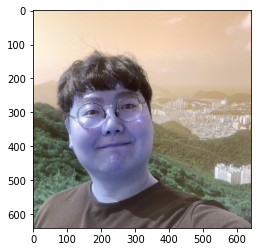

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

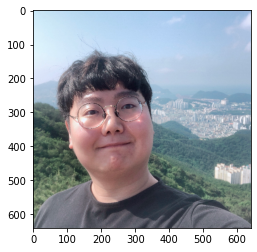

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()
print("Done")

Done


In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Done")

Done


# 얼굴 인식

rectangles[[(117, 242) (340, 464)]]


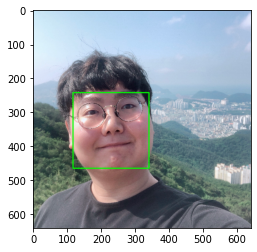

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_rect =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_rect)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Done")

Done


In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


# 랜드마크 불러오기

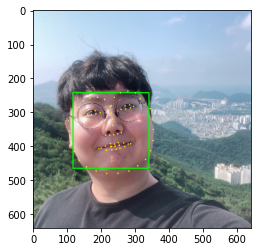

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb_landmark = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_landmark)
plt.show()

### 랜드마크를 활용하여 고양이 수염을 붙일 위치 선정
### 인중인 33번 랜드마크를 스티커 위치로 선정
### 첨부된 사진의 얼굴 기울기에 따라 자연스럽게 스티커의 각도가 자동으로 바뀔 수 있도록 양쪽 눈끝인 36번과 45번 랜드마크를 기준으로 얼굴 각도를 계산하여 스티커의 각도를 바꿀 수 있도록 함수 설계
### 눈을 기준으로 얼굴 기울기를 구한 이유는 눈이 사람의 얼굴을 인식하는 데에 기준점이 되기 때문

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    RM_x1 = landmark[36][0]
    RM_y1 = landmark[36][1]
    RM_x2 = landmark[45][0]
    RM_y2 = landmark[45][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print ('(RM_x1, RM_y1) : (%d,%d)'%(RM_x1, RM_y1))
    print ('(RM_x2, RM_y2) : (%d,%d)'%(RM_x2, RM_y2))
    
print(max(RM_y1, RM_y2)-min(RM_y1, RM_y2))

print(max(RM_x1, RM_x2)-min(RM_x1, RM_x2))

np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))

(237, 366)
(x,y) : (237,366)
(w,h) : (224,224)
(RM_x1, RM_y1) : (159,305)
(RM_x2, RM_y2) : (295,282)
23
136


0.1675324631258414

# 위의 삼각함수 계산으로 스티커 회전

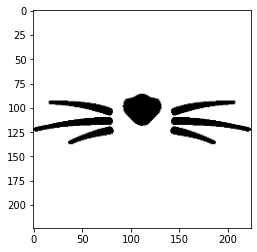

(224, 224, 3)


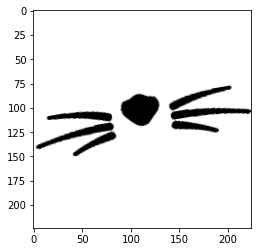

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
RM = cv2.getRotationMatrix2D((w/2,h/2), np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))*180/np.pi,1)
img_sticker = cv2.warpAffine(img_sticker, RM, (w,h), borderValue=(255,255,255))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# 스티커가 붙여질 좌표 계산

In [12]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (125,254)


# 계산된 좌표가 음수일 경우 스티커를 크롭
# 현재 사진은 스티커를 크롭할 필요가 없어서 스티커 유지됨

(224, 224, 3)
(x,y) : (125,254)


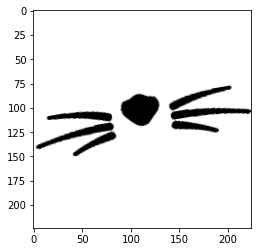

In [13]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
if refined_x < 0:
    img_sticker = img_sticker[:-refined_x]
    refined_x = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
plt.imshow(img_sticker)
plt.show()

(224, 224, 3)


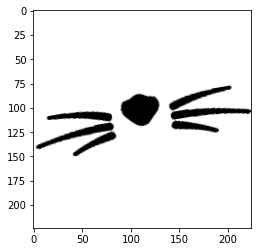

In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_sticker)
plt.show()

# 스티커를 붙일 기준으로 선정한 인중에 얼굴 각도 만큼 스티커가 회전하여 자연스럽게 적용된 모습 확인

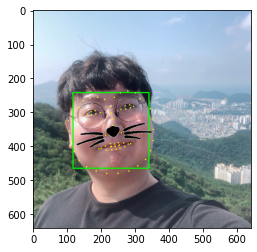

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 최종 결과

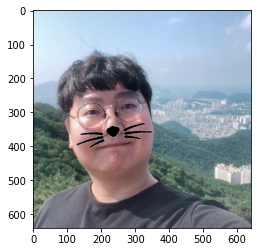

In [16]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

***

# 2.

## 다양한 사진에 대해 적용해 보기 위해 다른 사진에도 적용해 보았습니다.

## 배경과 함께 찍어 멀리서 찍힌 사진을 먼저 활용해 보았습니다.

## 얼굴이 작은 만큼 인식이 어려울 것으로 예상됩니다.

# 사진 불러오기

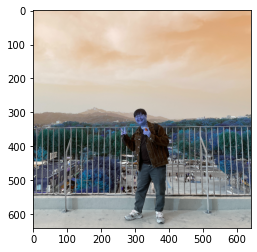

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/image2.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

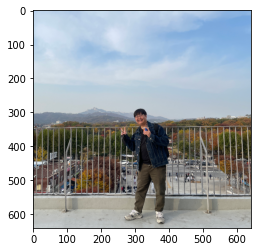

In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
detector_hog = dlib.get_frontal_face_detector()
print("Done")

Done


In [20]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Done")

Done


# 얼굴 인식

rectangles[[(293, 298) (329, 334)]]


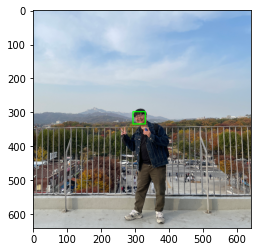

In [21]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_rect =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_rect)
plt.show()

In [22]:
model_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Done")

Done


In [23]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


# 랜드마크 불러오기

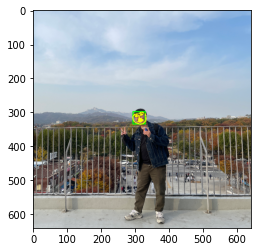

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb_landmark = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_landmark)
plt.show()

# 첫 사진과 동일하게 좌표 계산

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    RM_x1 = landmark[36][0]
    RM_y1 = landmark[36][1]
    RM_x2 = landmark[45][0]
    RM_y2 = landmark[45][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print ('(RM_x1, RM_y1) : (%d,%d)'%(RM_x1, RM_y1))
    print ('(RM_x2, RM_y2) : (%d,%d)'%(RM_x2, RM_y2))
    
print(max(RM_y1, RM_y2)-min(RM_y1, RM_y2))

print(max(RM_x1, RM_x2)-min(RM_x1, RM_x2))

np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))

(313, 320)
(x,y) : (313,320)
(w,h) : (37,37)
(RM_x1, RM_y1) : (300,312)
(RM_x2, RM_y2) : (321,306)
6
21


0.27829965900511133

# 위의 삼각함수 계산으로 스티커 회전
# 사진의 얼굴이 작은 만큼 스티커의 크기도 매우 작아졌습니다.

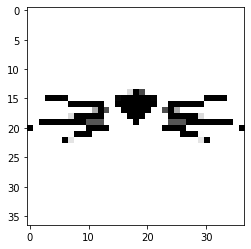

(37, 37, 3)


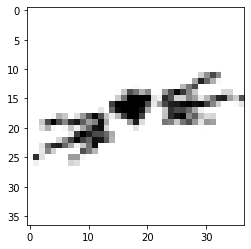

In [26]:
sticker_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
RM = cv2.getRotationMatrix2D((w/2,h/2), np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))*180/np.pi,1)
img_sticker = cv2.warpAffine(img_sticker, RM, (w,h), borderValue=(255,255,255))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# 스티커가 붙여질 좌표 계산

In [27]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (295,302)


# 계산된 좌표가 음수일 경우 스티커를 크롭
# 현재 사진은 스티커를 크롭할 필요가 없어서 스티커 유지됨

(37, 37, 3)
(x,y) : (295,302)


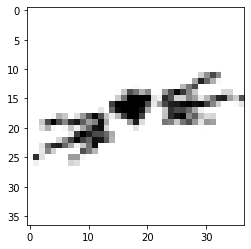

In [28]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
if refined_x < 0:
    img_sticker = img_sticker[:-refined_x]
    refined_x = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
plt.imshow(img_sticker)
plt.show()

(37, 37, 3)


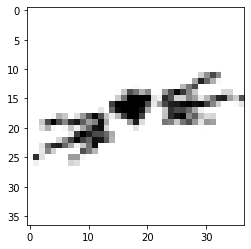

In [29]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_sticker)
plt.show()

# 스티커를 붙일 기준으로 선정한 인중에 얼굴 각도 만큼 스티커가 회전하여 자연스럽게 적용된 모습 확인

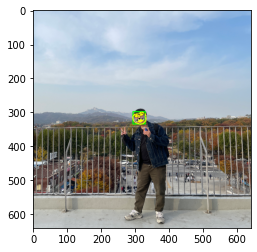

In [30]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 최종 결과

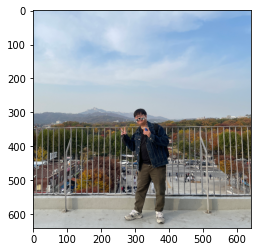

In [31]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 예상과 다르게 정확하게 얼굴 인식에 성공했습니다.
# 다만 얼굴이 작은 만큼 적용한 스티커는 잘 보이지 않았습니다.

***

# 3.

## 다음으로는 역광 사진을 활용해보았습니다.

## 얼굴에 잡광이 들어오고 고개도 약간 숙인터라 인식이 잘 안 될 것으로 예상합니다.

# 사진 불러오기

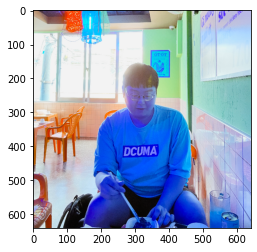

In [32]:
my_image_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/image3.png'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 640))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

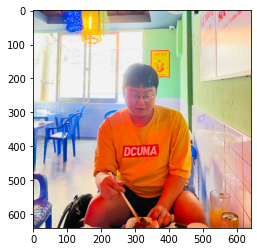

In [33]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [34]:
detector_hog = dlib.get_frontal_face_detector()
print("Done")

Done


In [35]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)
print("Done")

Done


# 얼굴 인식

rectangles[[(275, 226) (364, 315)]]


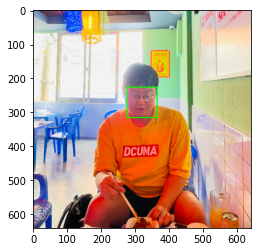

In [36]:
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_rect =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_rect)
plt.show()

In [37]:
model_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("Done")

Done


In [38]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


# 랜드마크 불러오기

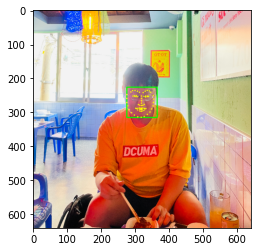

In [39]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb_landmark = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_landmark)
plt.show()

# 첫 사진과 동일하게 좌표 계산

In [40]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    RM_x1 = landmark[36][0]
    RM_y1 = landmark[36][1]
    RM_x2 = landmark[45][0]
    RM_y2 = landmark[45][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print ('(RM_x1, RM_y1) : (%d,%d)'%(RM_x1, RM_y1))
    print ('(RM_x2, RM_y2) : (%d,%d)'%(RM_x2, RM_y2))
    
print(max(RM_y1, RM_y2)-min(RM_y1, RM_y2))

print(max(RM_x1, RM_x2)-min(RM_x1, RM_x2))

np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))

(318, 280)
(x,y) : (318,280)
(w,h) : (90,90)
(RM_x1, RM_y1) : (293,252)
(RM_x2, RM_y2) : (339,253)
1
46


0.021735706841792664

# 위의 삼각함수 계산으로 스티커 회전

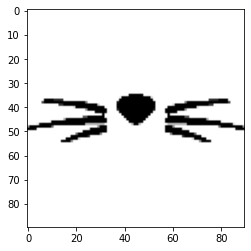

(90, 90, 3)


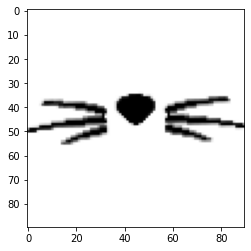

In [41]:
sticker_path = os.getenv('HOME')+'/aiffel/exp3/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
RM = cv2.getRotationMatrix2D((w/2,h/2), np.arctan((max(RM_y1, RM_y2)-min(RM_y1, RM_y2))/(max(RM_x1, RM_x2)-min(RM_x1, RM_x2)))*180/np.pi,1)
img_sticker = cv2.warpAffine(img_sticker, RM, (w,h), borderValue=(255,255,255))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

# 스티커가 붙여질 좌표 계산

In [42]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (273,235)


# 계산된 좌표가 음수일 경우 스티커를 크롭
# 현재 사진은 스티커를 크롭할 필요가 없어서 스티커 유지됨

(90, 90, 3)
(x,y) : (273,235)


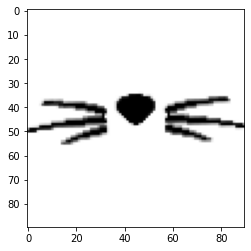

In [43]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
if refined_x < 0:
    img_sticker = img_sticker[:-refined_x]
    refined_x = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
plt.imshow(img_sticker)
plt.show()

(90, 90, 3)


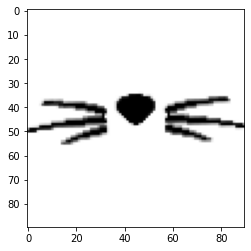

In [44]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(img_sticker)
plt.show()

# 스티커를 붙일 기준으로 선정한 인중에 얼굴 각도 만큼 스티커가 회전하여 자연스럽게 적용된 모습 확인

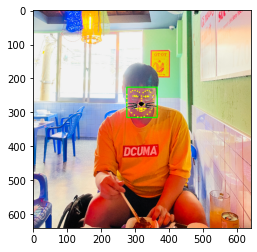

In [45]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 최종 결과

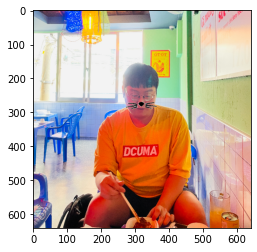

In [46]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 나름 난해한 조건의 사진이었는데도 얼굴 인식을 정확히 하여 스티커 적용이 성공적으로 이루어졌습니다.

***

# 다양한 사진에 적용했을 때 발생할 수있는 문제점

### 기존의 예제 코드는 사진에 스티커를 그대로 붙이는 형태였고 스티커가 사진을 벗어났을 때 스티커를 크롭하는 코드도 일반화되어 있지 않았습니다.  
### 따라서 과제를 진행하며 얼굴이 너무 가깝거나 사진 가장자리에 위치할 때 스티커가 합성 될 수 있도록 스티커를 크롭하는 코드를 일반화하였고, 얼굴 각도에 따라 스티커가 회전하여 자연스럽게 합성될 수 있도록 스티커의 각도를 랜드마크에 따라 자동으로 계산하여 스티커를 회전시키는 일반화한 코드를 작성하였습니다.  
### 좀 더 자연스럽게 적용하기 위해서는 벡터 계산을 통해 2차원상의 회전을 넘어서 입체적으로 스티커가 변형될 수 있도록 하면 좋을 듯 합니다.  
### 이미지 밝기의 경우 이미지가 너무 밝거나 너무 어두워서 얼굴 인식이 안 되는 것만 아니라면 스티커 적용 자체는 문제가 없으리라 생각됩니다. 실제로 역광 사진의 경우 얼굴도 숙인 상태에다가 빛 조건이 까다로워서 얼굴 인식이 안 되지 않을까 싶었지만 다행히 무사히 적용되는 모습을 볼 수 있었습니다. 생각보다 얼굴 인식 패키지의 성능이 좋은 것을 알 수 있었습니다.
### 또한, 먼 거리의 사진에서의 작은 얼굴까지도 인식에 성공하여 스티커를 제대로 붙이는 모습을 보여주었습니다.